# Employee Attrition Prediction Project
### End-to-End (Day 1 - Day 13)

## 📅 Day 1–3: Data Loading & Cleaning

In [2]:

import pandas as pd
import numpy as np

# Load dataset (replace with your actual file path)
file_path = "data.csv"  # or .xlsx
df = pd.read_csv(file_path)

# Preview data
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:

# Basic info
df.info()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
import pandas as pd

# Load the dataset safely
df = pd.read_csv("data.csv", encoding="latin1")

# Show all column names with their index
print("\n🔎 Column names in dataset:")
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")

# Try fuzzy matching to find "Attrition"
possible_cols = [col for col in df.columns if "attrition" in col.lower()]
print("\n👉 Columns that look like 'Attrition':", possible_cols)



🔎 Column names in dataset:
0: 'Age'
1: 'Attrition'
2: 'BusinessTravel'
3: 'DailyRate'
4: 'Department'
5: 'DistanceFromHome'
6: 'Education'
7: 'EducationField'
8: 'EmployeeCount'
9: 'EmployeeNumber'
10: 'EnvironmentSatisfaction'
11: 'Gender'
12: 'HourlyRate'
13: 'JobInvolvement'
14: 'JobLevel'
15: 'JobRole'
16: 'JobSatisfaction'
17: 'MaritalStatus'
18: 'MonthlyIncome'
19: 'MonthlyRate'
20: 'NumCompaniesWorked'
21: 'Over18'
22: 'OverTime'
23: 'PercentSalaryHike'
24: 'PerformanceRating'
25: 'RelationshipSatisfaction'
26: 'StandardHours'
27: 'StockOptionLevel'
28: 'TotalWorkingYears'
29: 'TrainingTimesLastYear'
30: 'WorkLifeBalance'
31: 'YearsAtCompany'
32: 'YearsInCurrentRole'
33: 'YearsSinceLastPromotion'
34: 'YearsWithCurrManager'

👉 Columns that look like 'Attrition': ['Attrition']


In [5]:
# ============================
# Day 1-2: Data Loading & Setup
# ============================

import pandas as pd
import numpy as np

# Load dataset with fallback encodings
try:
    df = pd.read_csv("data.csv", encoding="utf-8")
except UnicodeDecodeError:
    df = pd.read_csv("data.csv", encoding="latin1")

# ----------------------------
# Check if Attrition column exists
# ----------------------------
if "Attrition" not in df.columns:
    raise ValueError("⚠️ 'Attrition' column not found in dataset. Check the file!")

# ----------------------------
# Check if Attrition has valid values
# ----------------------------
if df["Attrition"].isna().all():
    print("⚠️ Attrition column is empty (all NaN). Attempting to fix...")

    # Try to reload with another encoding
    df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv", encoding="latin1")

# ----------------------------
# Convert Attrition values (Yes/No → 1/0)
# ----------------------------
if df["Attrition"].dtype == "object":
    df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# ----------------------------
# Final Check
# ----------------------------
print("✅ Attrition column check complete!")
print(df["Attrition"].value_counts(dropna=False))
print("\nColumns in dataset:\n", df.columns.tolist())


✅ Attrition column check complete!
Attrition
0    1233
1     237
Name: count, dtype: int64

Columns in dataset:
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## 📅 Day 4–6: Exploratory Data Analysis (EDA)

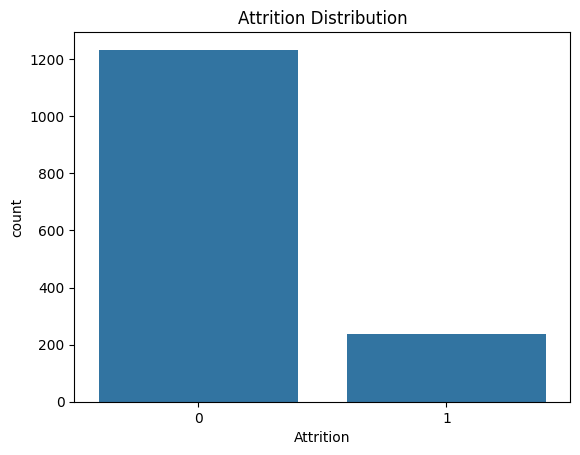

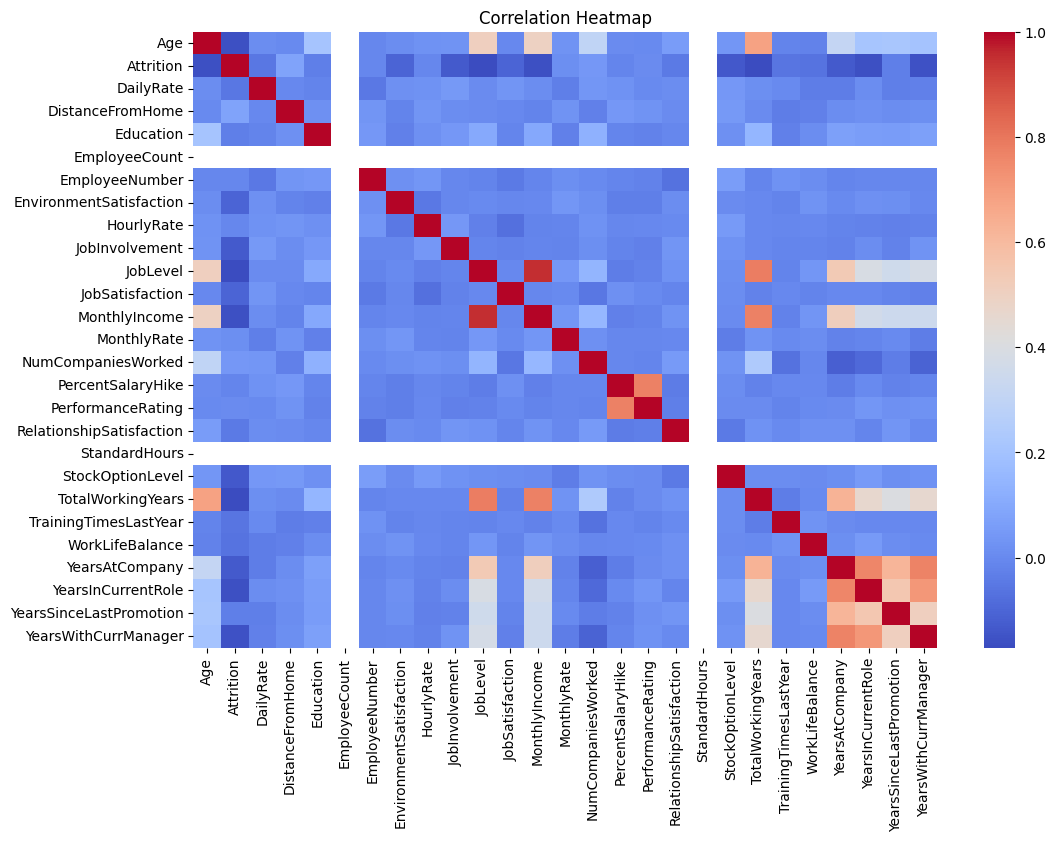

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

# Attrition distribution
sns.countplot(data=df, x="Attrition")
plt.title("Attrition Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## 📅 Day 7: Feature Engineering

In [7]:

from sklearn.preprocessing import LabelEncoder

# Encode categorical features
df_encoded = df.copy()
cat_cols = df_encoded.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Create tenure category
df_encoded["TenureCategory"] = pd.cut(df_encoded["YearsAtCompany"], bins=[-1,3,7,40],
                                      labels=["Short","Medium","Long"])

# Engagement score (average satisfaction metrics)
df_encoded["EngagementScore"] = df_encoded[[
    "JobSatisfaction","EnvironmentSatisfaction","RelationshipSatisfaction","WorkLifeBalance"
]].mean(axis=1)

df_encoded.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureCategory,EngagementScore
0,41,1,2,1102,2,1,2,1,1,1,...,0,8,0,1,6,4,0,5,Medium,2.00
1,49,0,1,279,1,8,1,1,1,2,...,1,10,3,3,10,7,1,7,Long,3.00
2,37,1,2,1373,1,2,2,4,1,4,...,0,7,3,3,0,0,0,0,Short,3.00
3,33,0,1,1392,1,3,4,1,1,5,...,0,8,3,3,8,7,3,0,Long,3.25
4,27,0,2,591,1,2,1,3,1,7,...,1,6,3,3,2,2,2,2,Short,2.50


In [8]:
print(df['Attrition'].unique())
print(df['Attrition'].isna().sum())


[1 0]
0


In [9]:
from sklearn.model_selection import train_test_split

# Define features (drop Attrition & other unnecessary cols)
X = df.drop(columns=['Attrition', 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'])
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1176, 30)
Test shape: (294, 30)


## 📅 Day 8–9: Model Building & Evaluation

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Step 1: Define features & target
X = df.drop(columns=['Attrition', 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'])
y = df['Attrition']

# Step 2: Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# Step 3: Preprocessor (OneHotEncode categorical features)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 5: Logistic Regression Pipeline
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

log_reg_pipeline.fit(X_train, y_train)
print("✅ Logistic Regression trained successfully")

# Step 6: Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)
print("✅ Random Forest trained successfully")

# Step 7: XGBoost Pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

xgb_pipeline.fit(X_train, y_train)
print("✅ XGBoost trained successfully")


c:\Users\EliteBook\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Logistic Regression trained successfully
✅ Random Forest trained successfully


c:\Users\EliteBook\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost trained successfully


## 📅 Day 10: Model Tuning + Feature Importance

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define param grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV with pipeline
rf_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions={'model__' + k: v for k, v in param_dist.items()},
    n_iter=10,
    cv=3,
    scoring='f1',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)

# ✅ Define best_rf
best_rf = rf_search.best_estimator_

print("Best RF Params:", rf_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best RF Params: {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_depth': None, 'model__bootstrap': False}


In [12]:
y_pred = best_rf.predict(X_test)


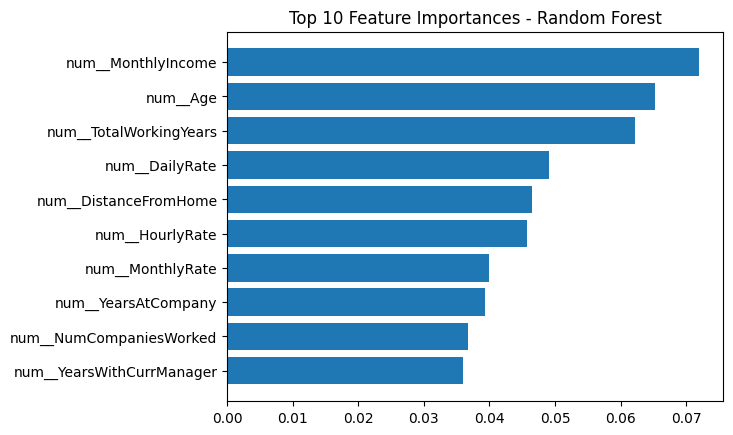

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature names after OneHotEncoding
feature_names = rf_search.best_estimator_['preprocessor'].get_feature_names_out()

# Extract importances
importances = best_rf['model'].feature_importances_

# Sort and plot
indices = np.argsort(importances)[::-1][:10]  # top 10
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder

# Make a copy
df_clean = df.copy()

# Encode target column 'Attrition' (Yes=1, No=0)
df_clean['Attrition'] = df_clean['Attrition'].map({'Yes': 1, 'No': 0})

# Label encode all categorical features
le = LabelEncoder()
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = le.fit_transform(df_clean[col])

# Now define X, y
X = df_clean.drop("Attrition", axis=1)
y = df_clean["Attrition"]

print("✅ Encoding done. Shapes:", X.shape, y.shape)


✅ Encoding done. Shapes: (1470, 34) (1470,)


In [15]:
import joblib

# Suppose best_rf is your tuned RandomForest model
joblib.dump(best_rf, "best_rf.pkl")
print("✅ Model saved as best_rf.pkl")


✅ Model saved as best_rf.pkl


## 📅 Day 12: Streamlit Visualizations (EDA + Features)
In `streamlit_app.py` you will:
- Load model
- Add prediction form
- Show Attrition dashboards and feature plots

## 📅 Day 13: Documentation + GitHub
- Write `README.md`
- Push notebook, cleaned dataset, and `requirements.txt`
- Include visuals and model files